In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import StandardScaler


In [2]:
cwd=os.getcwd()

In [3]:
prepath=os.path.dirname(cwd)

In [4]:
foldername_adapted_data=os.path.join(prepath,'New speed testing')

In [5]:
x=os.listdir(foldername_adapted_data)

In [6]:
x

['3-D Data creation pendulum  id1.ipynb',
 'PLS.ipynb',
 'RPM 120N.xlsx',
 'Rpm100.csv',
 'Rpm120.csv',
 'Rpm140.csv',
 'Rpm160.csv',
 'Rpm40.csv',
 'Rpm60.csv',
 'Rpm80.csv',
 'Speed simulation code step 1 and 2.ipynb',
 'Speed simulation code systematic resampling.ipynb',
 'Speed simulation code.ipynb']

In [7]:
all_files=os.listdir(foldername_adapted_data)

In [8]:
all_files

['3-D Data creation pendulum  id1.ipynb',
 'PLS.ipynb',
 'RPM 120N.xlsx',
 'Rpm100.csv',
 'Rpm120.csv',
 'Rpm140.csv',
 'Rpm160.csv',
 'Rpm40.csv',
 'Rpm60.csv',
 'Rpm80.csv',
 'Speed simulation code step 1 and 2.ipynb',
 'Speed simulation code systematic resampling.ipynb',
 'Speed simulation code.ipynb']

In [9]:
training_files=[f for f in all_files if f.endswith('csv')]
testing_files=[f for f in all_files if f.endswith('xlsx')]

In [10]:
training_files

['Rpm100.csv',
 'Rpm120.csv',
 'Rpm140.csv',
 'Rpm160.csv',
 'Rpm40.csv',
 'Rpm60.csv',
 'Rpm80.csv']

In [11]:
def extract_number(filename):
    match = re.search(r'\d+', filename)
    return int(match.group()) if match else 0

In [12]:
training_files_sorted=sorted(training_files,key=extract_number)

In [13]:
training_files_sorted

['Rpm40.csv',
 'Rpm60.csv',
 'Rpm80.csv',
 'Rpm100.csv',
 'Rpm120.csv',
 'Rpm140.csv',
 'Rpm160.csv']

In [14]:
Data=[pd.read_csv(os.path.join(foldername_adapted_data,f)) for f in training_files_sorted]

In [15]:
Data[0]

,Time,Speed of bottom,Weight on Bit
0,50.00,33.982159,610.937545
1,50.01,34.200625,607.754439
2,50.02,34.451168,605.449337
3,50.03,34.733521,601.213038
4,50.04,35.048337,595.224917
...,...,...,...
4996,99.96,40.990821,497.491072
4997,99.97,40.302364,506.032470
4998,99.98,39.640440,513.504358
4999,99.99,39.008478,521.513060


In [16]:
Data_working=[df.iloc[:,0:3] for df in Data]

In [17]:
Data_working[0]

,Time,Speed of bottom,Weight on Bit
0,50.00,33.982159,610.937545
1,50.01,34.200625,607.754439
2,50.02,34.451168,605.449337
3,50.03,34.733521,601.213038
4,50.04,35.048337,595.224917
...,...,...,...
4996,99.96,40.990821,497.491072
4997,99.97,40.302364,506.032470
4998,99.98,39.640440,513.504358
4999,99.99,39.008478,521.513060


In [18]:
Data_working=[df.T for df in Data_working]

In [19]:
df_speed=pd.concat([df.iloc[[1]] for df in Data_working], ignore_index=True)
df_tindex=pd.concat([df.iloc[[0]] for df in Data_working], ignore_index=True)
df_weight=pd.concat([df.iloc[[2],:] for df in Data_working], ignore_index=True)

In [20]:
df_speed

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,33.982159,34.200625,34.451168,34.733521,35.048337,35.397973,35.780499,36.197505,36.649822,37.136711,...,44.658204,43.917719,43.172616,42.430880,41.702013,40.990821,40.302364,39.640440,39.008478,38.408498
1,51.705216,53.150475,54.776062,56.589190,58.589987,60.773974,63.126617,65.624536,68.226588,70.880778,...,45.415782,45.607921,45.914944,46.338071,46.884484,47.558470,48.369506,49.324145,50.432819,51.705558
2,108.350680,112.808266,116.348315,118.667929,119.495754,118.626437,115.942680,111.454070,105.308410,97.810280,...,119.283335,119.282488,117.513905,113.918332,108.573322,101.703335,93.693598,85.093286,76.594981,68.960116
3,128.146363,117.048326,104.686813,91.929378,79.861253,69.715432,62.528670,58.572837,57.245593,57.686088,...,61.699794,64.842950,68.690361,73.271097,78.626047,84.773602,91.692750,99.300762,107.435496,115.849238
4,83.556611,78.730611,76.917581,77.842791,81.074433,86.214226,92.950965,101.005700,110.086587,119.838588,...,163.914541,160.931007,155.087876,146.729568,136.400665,124.816876,112.815445,101.316808,91.276509,83.556378
5,125.518922,133.573073,142.162345,150.625272,158.286405,164.494614,168.689579,170.457894,169.596576,166.140721,...,114.020867,119.508069,126.613398,134.782399,143.395043,151.784794,159.275973,165.227952,169.097952,170.497801
6,180.945390,180.808293,178.335905,173.800587,167.709766,160.750919,153.707415,147.376245,142.470162,139.543379,...,170.909766,164.291376,157.189571,150.405115,144.705082,140.733288,138.930769,139.482415,142.305247,147.059525


In [21]:
df_speed_array=df_speed.to_numpy()
df_weight_array=df_weight.to_numpy()
df_tindex_array=df_tindex.to_numpy()
array_collection=[]
array_collection.append(df_speed_array)
array_collection.append(df_weight_array)
array_collection.append(df_tindex_array)

In [22]:
array_3d_testing=np.stack(array_collection,axis=0)

In [23]:
array_3d_testing.shape

(3, 7, 5001)

In [24]:
array_3d_testing[0,:,:]

array([[ 33.98215854,  34.2006252 ,  34.45116752, ...,  39.64043994,
         39.00847795,  38.40849847],
       [ 51.70521574,  53.15047497,  54.7760623 , ...,  49.32414474,
         50.43281903,  51.70555838],
       [108.3506802 , 112.8082656 , 116.3483146 , ...,  85.09328616,
         76.59498072,  68.96011582],
       ...,
       [ 83.55661057,  78.73061105,  76.91758141, ..., 101.3168085 ,
         91.27650929,  83.55637791],
       [125.5189216 , 133.5730732 , 142.1623449 , ..., 165.2279516 ,
        169.0979521 , 170.4978014 ],
       [180.94539   , 180.8082929 , 178.3359047 , ..., 139.4824153 ,
        142.3052473 , 147.0595246 ]])

In [25]:
model_x=[extract_number(filename) for filename in training_files_sorted]
model_x_arr=np.array(model_x)
model_x_arr=model_x_arr.reshape(-1,1)
model_x_arr

array([[ 40],
       [ 60],
       [ 80],
       [100],
       [120],
       [140],
       [160]])

Modelling input parameters

In [26]:
scaler=StandardScaler()
model_x_arr_std=scaler.fit_transform(model_x_arr)

In [27]:
model_x_arr_std

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [28]:
testID=4

In [29]:
model_x_test=model_x_arr_std[testID]
model_y_test=array_3d_testing[0:2,testID,:]
model_x_train=np.delete(model_x_arr_std,testID)
intermediate_slice=np.delete(array_3d_testing,testID,axis=1)
model_y_train=intermediate_slice[0:2,:,:]
model_tindex=array_3d_testing[2,0,:]


In [30]:
model_x_train=model_x_train.reshape(-1,1)
model_x_test=model_x_test.reshape(-1,1)

In [31]:
model_y_test=model_y_test.reshape(2,1,5001)

In [32]:
model_x_train.shape

(6, 1)

In [33]:
model_x_test.shape

(1, 1)

In [34]:
model_y_test.shape

(2, 1, 5001)

In [35]:
model_y_test

array([[[ 83.55661057,  78.73061105,  76.91758141, ..., 101.3168085 ,
          91.27650929,  83.55637791]],

       [[609.1064813 , 598.0192561 , 584.337209  , ..., 617.2597291 ,
         617.1259653 , 607.5561696 ]]])

In [36]:
model_y_test

array([[[ 83.55661057,  78.73061105,  76.91758141, ..., 101.3168085 ,
          91.27650929,  83.55637791]],

       [[609.1064813 , 598.0192561 , 584.337209  , ..., 617.2597291 ,
         617.1259653 , 607.5561696 ]]])

In [37]:
model_y_train.shape

(2, 6, 5001)

HOSVD Part

In [38]:
import numpy as np

def unfold(tensor, mode):
    return np.moveaxis(tensor, mode, 0).reshape(tensor.shape[mode], -1)

In [39]:
def refold(matrix, mode, shape):
    new_shape = list(shape)
    order = [mode] + [i for i in range(len(shape)) if i != mode]
    reverse_order = np.argsort(order)
    new_shape[mode] = -1
    return np.moveaxis(matrix.reshape(new_shape), 0, mode).transpose(reverse_order)

In [40]:
def tensor_product(tensor, matrix, mode):
    shape = tensor.shape
    unfolded = unfold(tensor, mode)
    result_matrix = np.dot(matrix, unfolded)
    return refold(result_matrix, mode, shape)

In [41]:
import numpy as np
import tensorly as tl
from tensorly.decomposition import tucker

def determine_ranks_via_threshold(tensor, threshold=None):
    """
    Determine ranks for Tucker decomposition by comparing singular values to a threshold.
    
    Parameters:
    - tensor: Input tensor.
    - threshold: Threshold for singular values. If None, uses numpy's machine epsilon.
    
    Returns:
    - ranks: A list of integers representing the rank for each mode based on the threshold.
    """
    if threshold is None:
        threshold = np.finfo(tensor.dtype).eps  # Default epsilon, similar to MATLAB's eps
    
    ranks = []
    
    # Compute SVD for each mode and determine ranks based on the threshold
    for mode in range(tl.ndim(tensor)):
        unfolded = tl.unfold(tensor, mode)
        _, s, _ = np.linalg.svd(unfolded, full_matrices=False)
        
        # Find the rank by counting how many singular values are greater than the threshold
        effective_rank = np.sum(s > threshold)
        ranks.append(effective_rank)
    
    return ranks


# Determine ranks automatically without specifying a threshold
ranks = determine_ranks_via_threshold(model_y_train)
print("Ranks determined based on threshold:", ranks)

# Perform Tucker decomposition with the determined ranks
core, factors = tucker(model_y_train, rank=ranks)



Ranks determined based on threshold: [2, 6, 12]


In [42]:
core.shape

(2, 6, 12)

In [43]:
factors[0].shape

(2, 2)

In [44]:
factors[1].shape

(6, 6)

In [45]:
factors[2].shape

(5001, 12)

In [46]:
import numpy as np
import tensorly as tl
from tensorly.tenalg import mode_dot

def singular_values_per_mode(tensor):
    """
    Calculate the singular values for each mode of a higher-dimensional tensor.

    Parameters:
    - tensor: The input tensor as a NumPy array or any array-like structure compatible with Tensorly.

    Returns:
    - A list of arrays, where each array contains the singular values for one mode of the tensor.
    """
    num_modes = tl.ndim(tensor)
    singular_values_list = []
    
    for mode in range(num_modes):
        # Unfold the tensor along the current mode
        unfolded = tl.unfold(tensor, mode)
        
        # Perform SVD on the unfolded matrix to obtain singular values
        _, singular_values, _ = np.linalg.svd(unfolded, full_matrices=False)
        
        # Append the singular values to the list
        singular_values_list.append(singular_values)
    
    return singular_values_list

sv = singular_values_per_mode(model_y_train)



In [47]:
sv1=np.array(sv[0]/sum(sv[0]))
sv2=np.array(sv[1]/sum(sv[1]))
sv3=np.array(sv[2]/sum(sv[2]))

In [48]:
perc_info=0.95

In [49]:
temp = np.cumsum(sv1) < perc_info
nFEigen = np.sum(temp) + 1

# Calculate for sv2
temp = np.cumsum(sv2) < perc_info
a = np.sum(temp) + 1

# Calculate for sv3
temp = np.cumsum(sv3) < perc_info
ntindex = np.sum(temp) + 1

In [50]:
a

5

In [51]:
ntindex

6

In [52]:
new_s=core[:,0:a,:]

In [53]:
new_s.shape

(2, 5, 12)

In [54]:
len(factors)

3

In [55]:
factors[0].shape

(2, 2)

In [56]:
factors[2].shape

(5001, 12)

In [57]:
temp_u=[]
temp_u.append(factors[0])
temp_u.append(factors[2])

In [58]:
new_u=mode_dot(new_s,temp_u[0],mode=0)
new_u=mode_dot(new_u,temp_u[1],mode=2)

In [59]:
new_u.shape

(2, 5, 5001)

In [60]:
model_u=new_u

In [61]:
reduced_param=np.dot(tl.unfold(model_y_train,1),np.linalg.pinv(tl.unfold(model_u,1)))

In [62]:
reduced_param.shape

(6, 5)

In [63]:
reduced_param

array([[ 0.39876971, -0.52021848, -0.11008873,  0.32927739, -0.24657822],
       [ 0.40549676, -0.34634469, -0.10375805,  0.31134194, -0.10549381],
       [ 0.41180526, -0.20687948, -0.29902747, -0.53321221,  0.64165221],
       [ 0.41561702,  0.01237648,  0.87384127, -0.24488142, -0.05934793],
       [ 0.40825254,  0.4262728 , -0.35131571, -0.39076448, -0.61277232],
       [ 0.40934569,  0.62028807, -0.02600023,  0.54558551,  0.37059491]])

Gaussian Process Regression

In [64]:
paraMin = np.min(reduced_param, axis=0)
paraMax = np.max(reduced_param, axis=0)


# Perform min-max normalization
norm_reduced_param = (reduced_param - paraMin) / (paraMax - paraMin)

# Display normalized matrix
print("Normalized reduced_param:")
print(norm_reduced_param)

Normalized reduced_param:
[[0.         0.         0.19689475 0.79949149 0.29192199]
 [0.3992952  0.15245312 0.202062   0.78286609 0.40439142]
 [0.77374681 0.2747367  0.04267881 0.         1.        ]
 [1.         0.46698106 1.         0.26727049 0.44117791]
 [0.56286905 0.82988676 0.         0.13204305 0.        ]
 [0.62775484 1.         0.26552963 1.         0.78391901]]


In [65]:
out=np.dot(unfold(model_y_test,1),np.linalg.pinv(unfold(model_u,1)))

In [66]:
out

array([[ 0.40983033,  0.14050326, -0.04049571,  0.03289291,  0.0349277 ]])

In [67]:
norm_teparam=(out-paraMin)/(paraMax-paraMin)

In [68]:
norm_teparam

array([[0.65652157, 0.57932305, 0.25369811, 0.52475558, 0.51633239]])

In [69]:
model_x_train

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 1. ],
       [ 1.5]])

In [70]:
xs=np.linspace(min(model_x_train),max(model_x_train),100)

In [71]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [72]:
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))
models = []

In [73]:
model_x_train

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 1. ],
       [ 1.5]])

In [74]:
norm_reduced_param

array([[0.        , 0.        , 0.19689475, 0.79949149, 0.29192199],
       [0.3992952 , 0.15245312, 0.202062  , 0.78286609, 0.40439142],
       [0.77374681, 0.2747367 , 0.04267881, 0.        , 1.        ],
       [1.        , 0.46698106, 1.        , 0.26727049, 0.44117791],
       [0.56286905, 0.82988676, 0.        , 0.13204305, 0.        ],
       [0.62775484, 1.        , 0.26552963, 1.        , 0.78391901]])

In [75]:
for i in range(norm_reduced_param.shape[1]):
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gpr.fit(model_x_train,norm_reduced_param[:,i])
    models.append(gpr)

In [76]:
model_teparam_pred=[]
model_teparam_sd=[]
model_tepram_int=[]

In [77]:
for i in range(norm_reduced_param.shape[1]):
    Y_pred,sigma=models[i].predict(model_x_test,return_std=True)
    print(Y_pred)
    model_teparam_pred.append(Y_pred)
    model_teparam_sd.append(sigma)

[0.83372027]
[0.66826405]
[0.11470805]
[0.0743224]
[1.55344714e-07]


In [78]:
model_teparam_pred_plotting=model_teparam_pred

In [79]:
model_teparam_pred_plotting=np.array(model_teparam_pred_plotting)

In [80]:
model_teparam_sd_plotting=model_teparam_sd

In [81]:
model_teparam_sd_plotting=np.array(model_teparam_sd_plotting)

In [82]:
model_teparam_sd_plotting

array([[0.03772221],
       [0.0104414 ],
       [0.43206846],
       [0.45488819],
       [0.58565025]])

In [83]:
lower_interval=[]
upper_interval=[]

In [84]:
for i in range(len(model_teparam_pred)):
    lower_interval_val=model_teparam_pred_plotting[i]-1.96*model_teparam_sd_plotting[i]
    lower_interval.append(lower_interval_val)
    upper_interval_val=model_teparam_pred_plotting[i]+1.96*model_teparam_sd_plotting[i]
    upper_interval.append(upper_interval_val)

In [85]:
for i in range(len(model_teparam_pred)):
    model_teparam_pred[i]=model_teparam_pred[i]*(paraMax[i]-paraMin[i])+paraMin[i]
    model_teparam_sd[i]=model_teparam_sd[i]*(paraMax[i]-paraMin[i])+paraMin[i]

In [86]:
model_teparam_sd=np.array(model_teparam_sd)

In [87]:
model_teparam_pred=np.array(model_teparam_pred)

In [88]:
model_teparam_sd.shape

(5, 1)

In [89]:
model_teparam_pred.shape

(5, 1)

In [90]:
model_teparam_pred=np.transpose(model_teparam_pred)

For all intermittent points

In [91]:
xs[0]

array([-1.5])

In [92]:
all_test_pred=[]
all_test_sd=[]

In [93]:
for i in range(norm_reduced_param.shape[1]):
    Y_pred,sigma=models[i].predict(xs,return_std=True)
    all_test_pred.append(Y_pred)
    all_test_sd.append(sigma)

In [94]:
all_test_pred=np.array(all_test_pred)
all_test_sd=np.array(all_test_sd)

In [95]:
all_test_pred.shape

(5, 100)

In [96]:
all_test_pred=np.transpose(all_test_pred)

In [97]:
all_test_pred.shape

(100, 5)

In [98]:
lower_limit_all=[]
upper_limit_all=[]

In [99]:
all_test_sd_tr=np.transpose(all_test_sd)

In [100]:
for i in range(0,all_test_pred.shape[0]):
    print(i)
    lower_interval_val=all_test_pred[i]-1.96*all_test_sd_tr[i]
    lower_limit_all.append(lower_interval_val)
    upper_interval_val=all_test_pred[i]+1.96*all_test_sd_tr[i]
    upper_limit_all.append(upper_interval_val)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [101]:
lower_limit_all_arr=np.array(lower_limit_all)
upper_limit_all_arr=np.array(upper_limit_all)

In [102]:
lower_limit_all_arr.shape

(100, 5)

In [103]:
len(lower_limit_all)

100

In [104]:
len(upper_limit_all)

100

In [105]:
len(models)

5

In [106]:
xs.shape

(100, 1)

In [107]:
model_x_train

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 1. ],
       [ 1.5]])

In [108]:
all_test_pred.shape

(100, 5)

In [109]:
len(xs)

100

In [110]:
model_teparam_pred_plotting.ravel()

array([8.33720272e-01, 6.68264047e-01, 1.14708045e-01, 7.43224037e-02,
       1.55344714e-07])

In [111]:
model_teparam_sd_plotting.shape

(5, 1)

0
1
2
3
4


<Figure size 1000x600 with 0 Axes>

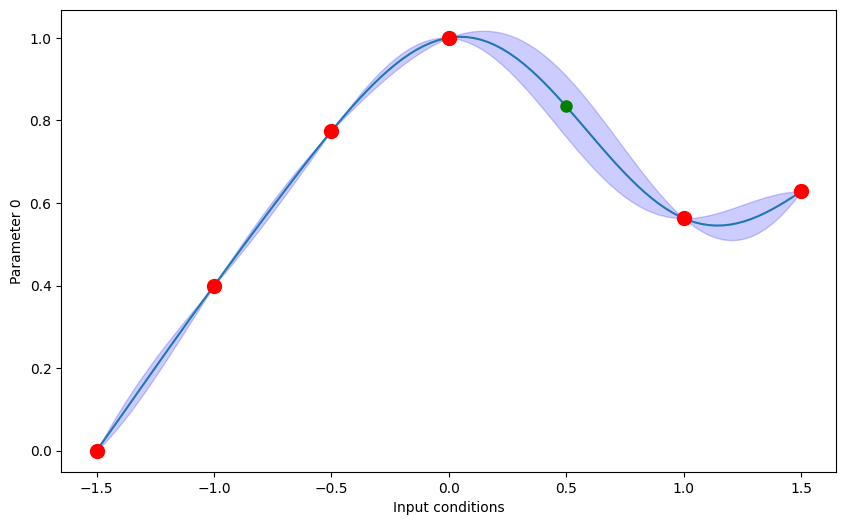

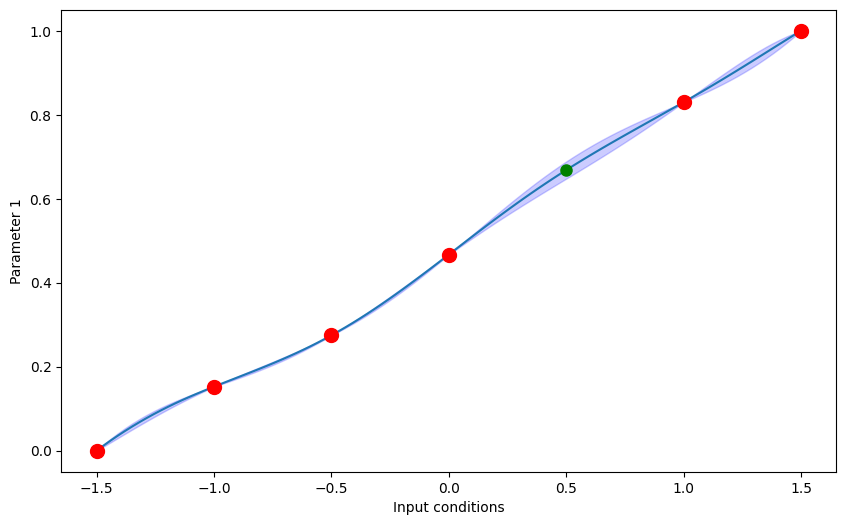

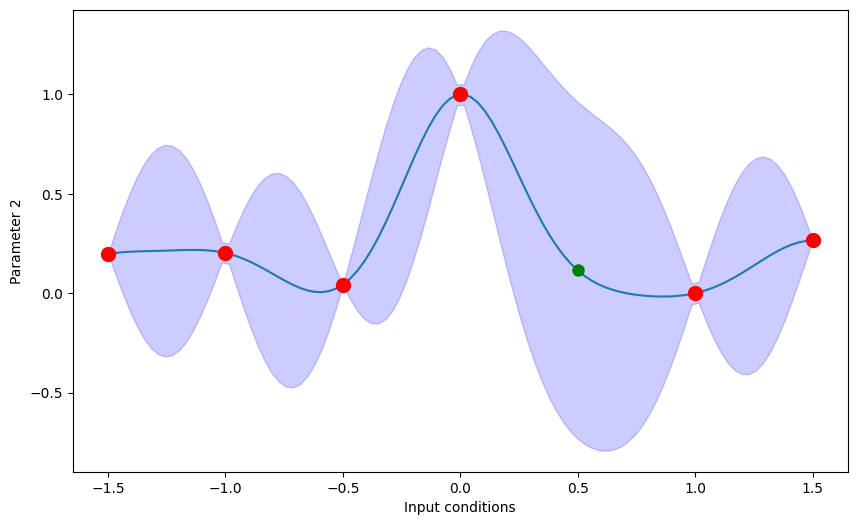

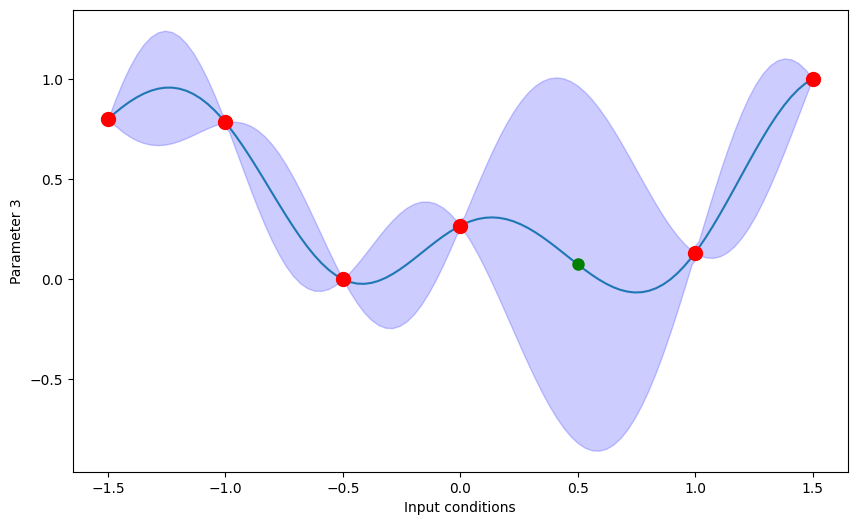

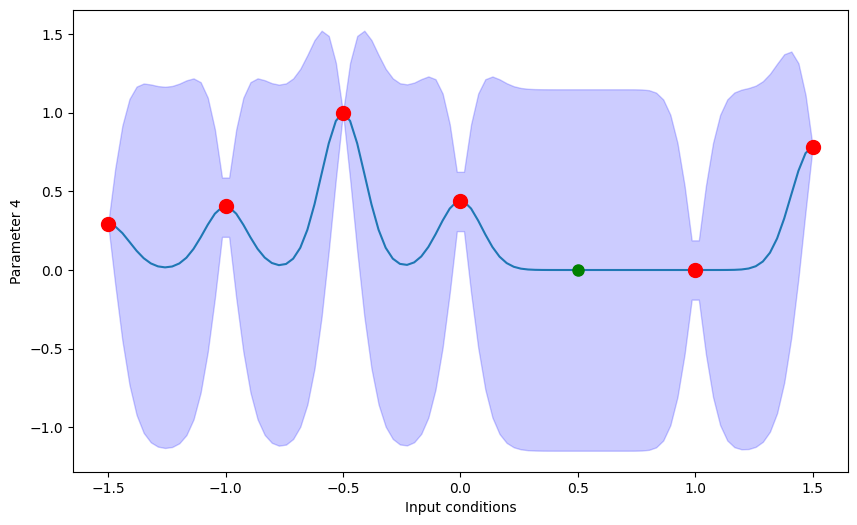

In [112]:
plt.figure(figsize=(10,6))
for i in range(len(models)):
    print(i)
    plt.figure(figsize=(10,6))
    plt.plot(xs,all_test_pred[:,i],label='predictions')
    plt.fill_between(xs.ravel(),lower_limit_all_arr[:,i],upper_limit_all_arr[:,i],alpha=0.2,color='blue',label='Prediction interval')
    plt.plot(model_x_train.ravel(),norm_reduced_param[:,i],'ro',markersize=10,label='Training point')
    plt.plot(model_x_test.ravel(),model_teparam_pred_plotting.ravel()[i],'go',markersize=8,label='Testing point point prediction')
    plt.xlabel('Input conditions')
    plt.ylabel('Parameter {}'.format(i))

In [113]:
from tensorly.tenalg import mode_dot

In [114]:
a=mode_dot(model_u,model_teparam_pred,mode=1)

In [115]:
a.shape

(2, 1, 5001)

In [116]:
a.shape

(2, 1, 5001)

In [117]:
a[0,:,:].shape

(1, 5001)

In [118]:
model_y_test.shape

(2, 1, 5001)

In [119]:
model_tindex

array([ 50.  ,  50.01,  50.02, ...,  99.98,  99.99, 100.  ])

In [120]:
predictions_speed=a[0,:,:]
true_values_speed=model_y_test[0,:,:]

In [121]:
predictions_weight=a[1,:,:]
true_values_weight=model_y_test[1,:,:]

In [122]:
combined_df_speed=pd.DataFrame({'Predicted speed':predictions_speed.reshape(-1),
                            'True speed':true_values_speed.reshape(-1)})

In [123]:
combined_df_weight=pd.DataFrame({'Predicted weight':predictions_weight.reshape(-1),
                            'True weight':true_values_weight.reshape(-1)})

In [124]:
for_time=Data_working[0]
for_time=for_time.T

In [125]:
combined_df_speed['Time step']=for_time['Time']
combined_df_weight['Time step']=for_time['Time']

In [126]:
combined_df_weight

,Predicted weight,True weight,Time step
0,492.926431,609.106481,50.00
1,471.922713,598.019256,50.01
2,459.947000,584.337209,50.02
3,441.029240,574.964787,50.03
4,443.668949,568.066747,50.04
...,...,...,...
4996,437.647042,607.598611,99.96
4997,436.284773,621.656117,99.97
4998,445.428639,617.259729,99.98
4999,478.467345,617.125965,99.99


In [127]:
new_df=pd.DataFrame({'Predicted speed':combined_df_speed['Predicted speed'],
                     'Predicted weight':combined_df_weight['Predicted weight']})

In [128]:
plotting_speed=combined_df_speed.iloc[100:160]
plotting_weight=combined_df_weight.iloc[100:160]

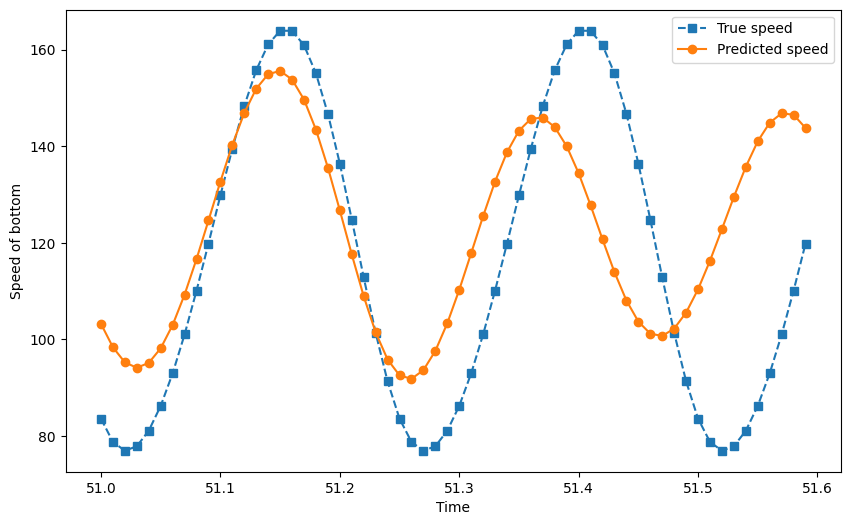

In [129]:
plt.figure(figsize=(10,6))
plt.plot(plotting_speed['Time step'],plotting_speed['True speed'],marker='s',linestyle='--',label='True speed')
plt.plot(plotting_speed['Time step'],plotting_speed['Predicted speed'],marker='o',linestyle='-',label='Predicted speed')
plt.xlabel('Time')
plt.ylabel('Speed of bottom')
plt.legend()

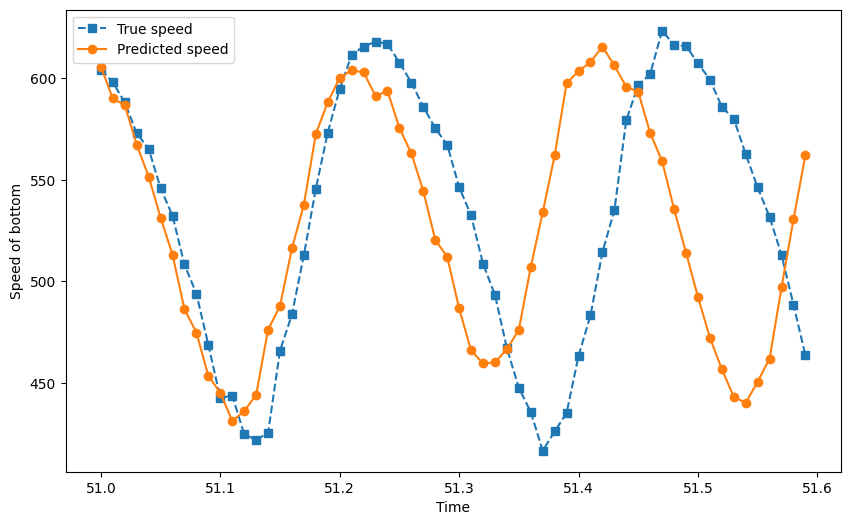

In [130]:
plt.figure(figsize=(10,6))
plt.plot(plotting_weight['Time step'],plotting_weight['True weight'],marker='s',linestyle='--',label='True speed')
plt.plot(plotting_weight['Time step'],plotting_weight['Predicted weight'],marker='o',linestyle='-',label='Predicted speed')
plt.xlabel('Time')
plt.ylabel('Speed of bottom')
plt.legend()

In [131]:
observations_df=pd.read_excel('RPM 120N.xlsx')

In [132]:
observations_df

,Time,Speed of bottom,Weight on bit
0,50.00,85.652952,601.101111
1,50.01,80.918172,590.644050
2,50.02,79.196646,577.597733
3,50.03,80.213533,568.865769
4,50.04,83.536917,562.612075
...,...,...,...
4996,99.96,126.929681,622.433160
4997,99.97,115.121499,637.373572
4998,99.98,103.815596,633.855441
4999,99.99,93.967329,634.594392


In [133]:
observation_arr=observations_df.values

In [134]:
obs1=observation_arr[:,1:3]

In [135]:
obs1

array([[ 85.65295156, 601.10111056],
       [ 80.91817198, 590.64405022],
       [ 79.19664567, 577.5977333 ],
       ...,
       [103.81559562, 633.8554408 ],
       [ 93.96732859, 634.59439242],
       [ 86.4383412 , 625.89087686]])

In [136]:
from scipy.stats import norm
import tensorly as tl
from tensorly.tenalg import mode_dot


In [137]:
import numpy as np
from scipy.stats import norm

def p_xk_given_obs(xk, obs, sigma):
    """
    Calculate the probability of each sensor.
    """
    # Broadcasting obs to match the shape of xk for element-wise subtraction
    p = norm.pdf(xk - obs, 0, sigma)
    
    # Check if any values in p are NaN or Inf

    # Initialize the output with the first column of p
    out = p[:, 0]
    
    # Iterate over the remaining columns of p and multiply probabilities
    for i in range(1, p.shape[1]):
        out *= p[:, i]
    
    # Reshape out to be a column vector
    out = out.reshape(-1, 1)
    
    return out

In [138]:
def resample(xk, wk, resampling_strategy='multinomial_resampling'):
    """
    Resampling process to avoid particle degeneracy.
    """
    Ns = len(wk)
    if resampling_strategy == 'multinomial_resampling':
        indices = np.random.choice(np.arange(Ns), size=Ns, replace=True, p=wk)
    elif resampling_strategy == 'systematic_resampling':
        edges = np.cumsum(wk)
        edges = np.insert(edges, 0, 0)  # Insert 0 at the beginning
        edges[-1] = 1
        u1 = np.random.rand() / Ns
        sampling_points = np.arange(u1, 1, 1/Ns)
        k = np.digitize(sampling_points, edges, right=True)
    else:
        raise ValueError("Resampling strategy not implemented")
    xk_resampled = xk[indices, :]
    wk_resampled = np.ones(Ns) / Ns
    return xk_resampled, wk_resampled

In [139]:
model_teparam_sd

array([[ 0.39940522],
       [-0.50830999],
       [ 0.17803598],
       [-0.04247987],
       [ 0.12188171]])

In [145]:
def ROPF_fun(Model, pf):
    # Generate initial particles and weights
    pf['iniparticle'] = np.tile(Model['teparam'], (pf['Ns'], 1)) + np.random.randn(pf['Ns'], Model['teparam'].shape[1]) * np.sqrt(np.abs(Model['teparamsd'])).reshape(1, -1) * 2
    pf['iniwk'] = np.ones(pf['Ns']) / pf['Ns']
    pf['b'] = 0.2  # User-defined parameter for variance

    for k in range(len(Model['t'])):  # Adjusted for Python tensor notation
        if k == 0:
            wkm1 = pf['iniwk']  # Initial weights
            paramm1 = pf['iniparticle']
        else:
            wkm1 = pf['w'][:, k - 1]
            paramm1 = pf['particles'][:, :, k - 1]

        # Reshape paramm1 for tensor operations
        temp = paramm1  # Unfold along the second dimension (equivalent to the first mode in MATLAB)


        # Propagate particles using tensor product
        xkm1 = mode_dot(Model['u'], temp, mode=1)  # Apply tensor product along the necessary dimensions
        # print(f'xkm1 shape: {xkm1.shape}')  
        
        # Update weight
        obs = pf['obs'][k, :]
        tempxk = xkm1[:, :, k]  # Adjusted for Python tensor notation
        tempxk=np.transpose(tempxk)
        m=p_xk_given_obs(tempxk, obs, pf['sigma_s'])


        wk = wkm1*m
          # Should print (200,)
        # print(f'weight shape: {wk.shape}')  # Should print (200,)
        wk /= np.sum(wk)  # Normalize weight vector

        # Calculate effective sample size
        Neff = 1 / np.sum(wk ** 2)
        resample_percentage = 0.50
        Nt = resample_percentage * pf['Ns']

        # Resample if necessary
        if Neff < Nt:
            print('Resampling ...')
            param, pf['w'][:, k] = resample(paramm1.T, wk, resampling_strategy='systematic_resampling')
            param = param.T
        else:
            param = paramm1
            pf['w'][:, k] = wkm1

        # Avoid sample impoverishment
        eff_Np = np.sum(np.sum((tempxk > obs - 3 * pf['sigma_s']) & (tempxk < obs + 3 * pf['sigma_s']), axis=1) > 1)
        if eff_Np < 40:
            pf['particles'][:, :, k] = param + np.random.randn(pf['Ns'], Model['teparam'].shape[1]) * 0.2
        else:
            pf['particles'][:, :, k] = param

        # Obtain state prediction
        # print('Param shape')
        # print(param.shape)
        temp = param
        a=mode_dot(Model['u'], temp, mode=1)
        # print(a.shape)
        b=np.mean(a,axis=1)
        Model['yt_prek'][:, k, :] = b

    return Model, pf


In [141]:
model_teparam_pred.shape

(1, 5)

In [146]:
Model = {
        't': np.arange(obs1.shape[0]),
        'teparam': model_teparam_pred,  # Adjusted for Python tensor notation
        'teparamsd': model_teparam_sd,  # Dummy teparamsd
        'u': model_u,  # Adjusted for Python tensor notation
        'yt_prek': np.zeros((2,len(model_tindex),len(model_tindex)))  # Adjusted for Python tensor notation
    }

pf = {
        'obs': obs1,
        'Ns': 200,  # Number of particles
        'w': np.zeros((200, obs1.shape[0])),  # Particle weights
        'particles': np.zeros((200,model_teparam_pred.shape[1] , obs1.shape[0])),  # Particles
        'sigma_s': 0.45  # Sensor noise level
    }

Model, pf = ROPF_fun(Model, pf)



C:\Users\asus\AppData\Local\Temp\ipykernel_41872\2303186535.py:33: RuntimeWarning: invalid value encountered in divide
  wk /= np.sum(wk)  # Normalize weight vector


In [147]:
len(Model['t'])

5001

In [148]:
new_df

,Predicted speed,Predicted weight
0,110.368927,492.926431
1,116.291664,471.922713
2,122.849267,459.947000
3,129.516954,441.029240
4,135.752997,443.668949
...,...,...
4996,134.129467,437.647042
4997,141.809317,436.284773
4998,147.836334,445.428639
4999,151.735311,478.467345


In [149]:
output_arr=new_df.values

In [150]:
output_arr.shape

(5001, 2)

In [151]:
Model['yt_prek'].shape

(2, 5001, 5001)

In [152]:
    # Smooth the prediction with moving average (not fully implemented here)
finalPred = np.zeros((len(Model['t']), 2))

In [153]:
finalPred[:10, :] = output_arr[:10,:]


In [154]:
winSize = 1
sum1 = 0
sum2 = 0

for i in range(1, winSize):
    sum1 += Model['yt_prek'][0, i, winSize]
    sum1 += Model['yt_prek'][1, i, winSize ]

for i in range(10, len(Model['t'])):
    sum1 += Model['yt_prek'][0, i-1, i]
    sum2 += Model['yt_prek'][1, i-1, i]
    finalPred[i, 0] = sum1 / winSize
    finalPred[i, 1] = sum2 / winSize
    sum1 -= Model['yt_prek'][0, i-winSize, i]
    sum2 -= Model['yt_prek'][1, i-winSize, i]

In [155]:
finalPred.shape

(5001, 2)

In [156]:
finalPred

array([[110.36892742, 492.92643072],
       [116.29166361, 471.92271341],
       [122.84926696, 459.94700029],
       ...,
       [239.26143042, 504.1452594 ],
       [226.36325686, 580.19520307],
       [209.15284182, 616.40996253]])

In [157]:
Model['t'].shape

(5001,)

In [158]:
model_y_test.shape

(2, 1, 5001)

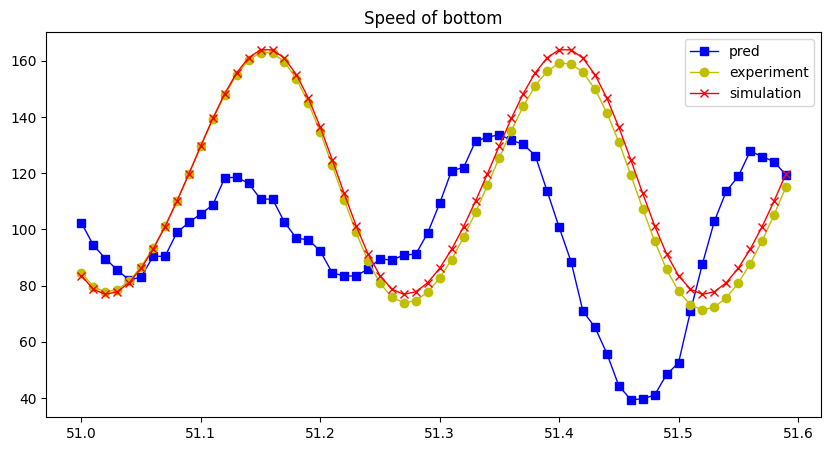

In [165]:
fig1, ax1 = plt.subplots(figsize=(10, 5))  # Set the figure size as needed

# Plot on the first figure
ax1.plot(for_time['Time'][100:160], finalPred[100:160, 0], 'b', linewidth=1, label='pred',marker='s')
ax1.plot(for_time['Time'][100:160], obs1[100:160, 0], 'y-', linewidth=1, label='experiment',marker='o')
ax1.plot(for_time['Time'][100:160], model_y_test[0, :, 100:160].flatten(), 'r-', linewidth=1, label='simulation',marker='x')
ax1.legend()
ax1.set_title('Speed of bottom')

# Show the first figure
plt.show()

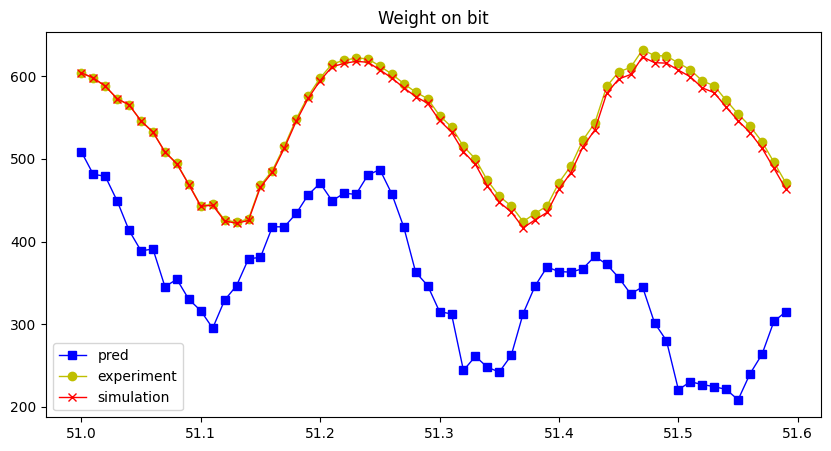

In [166]:
fig2, ax2 = plt.subplots(figsize=(10, 5))  # Set the figure size as needed

# Plot on the second figure
ax2.plot(for_time['Time'][100:160], finalPred[100:160, 1], 'b', linewidth=1, label='pred',marker='s')
ax2.plot(for_time['Time'][100:160], obs1[100:160, 1], 'y-', linewidth=1, label='experiment',marker='o')
ax2.plot(for_time['Time'][100:160], model_y_test[1, :, 100:160].flatten(), 'r-', linewidth=1, label='simulation',marker='x')
ax2.legend()
ax2.set_title('Weight on bit')

# Show the second figure
plt.show()